In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


[Text(0, 0.5, 'Median house value, $k'),
 Text(0.5, 1.0, 'Median house value boxplot')]

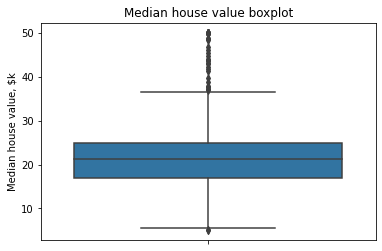

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot:
ax1= sns.boxplot(y='MEDV', data = boston_df)
ax1.set(ylabel='Median house value, $k',
       title='Median house value boxplot')

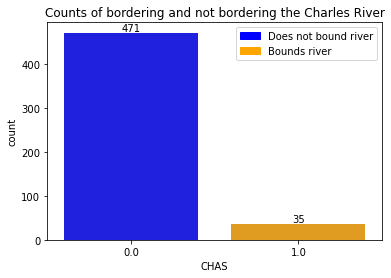

In [25]:
#Provide a barplot of the Charles River variable:

# pyplot.locator_params(axis='x', nbins=2) # set the number of bins such that only the 2 values are shown on the x-axis, and no 0.2, 0.4, etc.
# pyplot.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['red','green'])
# pyplot.xlabel('Charles River Tracting')
# pyplot.ylabel('Count')
# pyplot.title('Charles River distribution bar plot')

# or could use:

import matplotlib.patches as mpatches
ax = sns.countplot(x='CHAS', data=boston_df, palette=['blue',"orange"])
ax.set(title='Counts of bordering and not bordering the Charles River')
ax.bar_label(ax.containers[0]) #to get the counts displayed on the graph
#Need to go through this madness to get the full legend to display:
blue_patch = mpatches.Patch(color='blue', label='Does not bound river')
orange_patch = mpatches.Patch(color='orange', label='Bounds river')
ax.legend(handles=[blue_patch, orange_patch]) #turns out handles was the useful keyword to get full legend shown


[Text(0, 0.5, 'Median house value, $k'),
 Text(0.5, 1.0, 'Median house value boxplot by age group')]

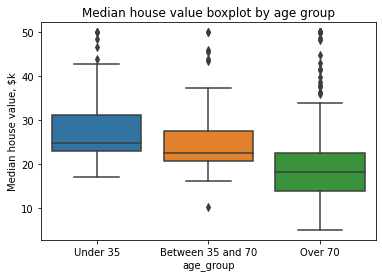

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#First, just like in the course, create a new column to the dataframe with the age group specified:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'Under 35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'Over 70'
# boston_df.head()

ax2=sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=['Under 35','Between 35 and 70','Over 70'])
ax2.set(ylabel='Median house value, $k',
       title='Median house value boxplot by age group')

[Text(0.5, 1.0, 'Nitric oxide concentration vs proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxide concentrations'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town')]

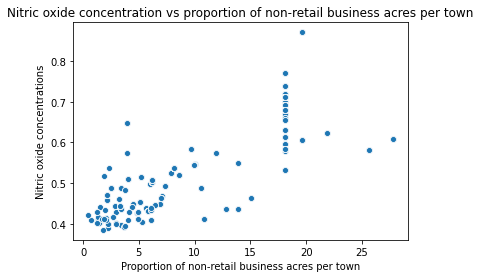

In [28]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
ax3 = sns.scatterplot(y="NOX", x="INDUS", data=boston_df)
ax3.set(title="Nitric oxide concentration vs proportion of non-retail business acres per town", ylabel='Nitric oxide concentrations', xlabel = 'Proportion of non-retail business acres per town')

#There is clearly a linear relationship to some extent between the INDUS and NOX variables. Perhaps as there is more industrial production in an area, the higher the nitrogen oxide that will be present in that area. The industrial production could have chemical by-products that raise the Nitric oxide in the area.

[Text(0.5, 0, 'Pupil to Teach Ratio'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Pupil to Teach Ratio Counts')]

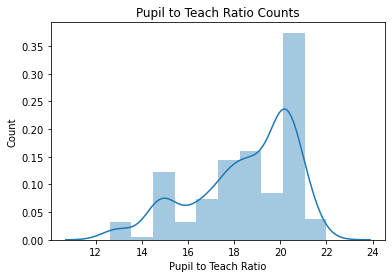

In [10]:
#Create a histogram for the pupil to teacher ratio variable
#boston_df.describe()
ax4=sns.distplot(boston_df['PTRATIO'], bins=10, kde=True, )
ax4.set(xlabel='Pupil to Teach Ratio', ylabel='Count', title='Pupil to Teach Ratio Counts')

QUESTION: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Null hypothesis: There is no significant difference in median house value based on bordering the Charles River.

#Alternate hypothesis: Bordering the Charles River does have an  effect on median house value.

In [12]:

#Use Levene's to check for equality of variance:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we cannot assume equality of variance!

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

#since the p-value is less than 0.05 we cannot assume equality of variance.

In [16]:
#Now run the t-test:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#Conclusion: Since the p-value is less than the alpha value 0.05, I reject the null hypothesis as there is enough proof that 
#there is a statistical difference in median house value depending on bordering the Charles River.

QUESTION: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Null hypothesis: There is no difference in median house values based on proportion of owner occupied unites built prior to 1949 (the AGE variable).

#Alternative hypothesis: This is an effect on MEDV depending on the category of AGE.

In [19]:

#First reintroduce the grouping of the 'AGE' variable from before:

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'Under 35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'Over 70'

#Next run Levene to check for equality of variance:



scipy.stats.levene(boston_df[boston_df['age_group'] == 'Under 35']['MEDV'],
                   boston_df[boston_df['age_group'] == 'Between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'Over 70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

#since the p-value is greater than 0.05 we can indeed assume equality of variance!

In [21]:
# Now I'll run the ANOVA test:

#Create variables for the categorization of the age_group variable:

young = boston_df[boston_df['age_group'] == 'Under 35']['MEDV']
middle = boston_df[boston_df['age_group'] == 'Between 35 and 70']['MEDV']
older = boston_df[boston_df['age_group'] == 'Over 70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(young, middle, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#Conclusion: Since the p-value is less than 0.05, I will reject the null hypothesis as there is significant evidence that
#median house values differ depending on which age group is present.

QUESTION: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#Null hypothesis: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#Alternative hypothesis: This is a relationship between NOX and INDUS readings.

In [23]:
#Here is the Pearson Correlation test:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

#Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between NOX and INDUS.

QUESTION: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Null hypothsis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

#Alternative hypothesis: An additional weighted distance to the five Boston employment centres would have a significant, noticeable effect on MEDV.

In [11]:

#Here is the regression analysis with an intercept/addition/constant added in:

y = boston_df['MEDV']
X = boston_df['DIS']
X = sm.add_constant(X) #Here is the constant/intercept portion
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.21e-08
Time:                        02:13:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Conclusion: Since the coef in the middle table for the DIS row is 1.0916, the effect of additional weighted distance to the five Boston 
#employment centres on MEDV would be an increase in MEDV by 1.0916 thousand dollars.